In [107]:
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
import pandas as pd
import numpy as np
import matplotlib as mpl
from scipy.interpolate import interp1d

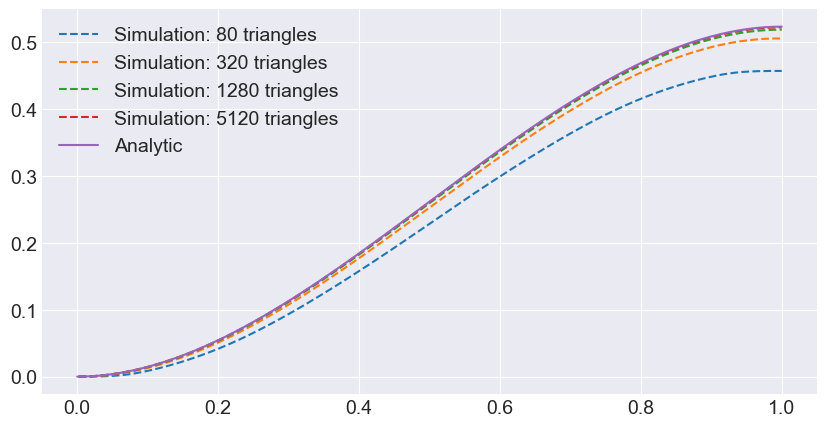

In [112]:
data_coarse = pd.read_csv("data/CoarseSphereResults.csv")
data_semi_coarse = pd.read_csv("data/SemiCoarseSphereResults.csv")
data_semi_detailed = pd.read_csv("data/SemiDetailedSphereResults.csv")
data_detailed = pd.read_csv("data/DetailedSphereResults.csv")

R = 0.5
h_analytical = np.linspace(0, 2*R, 500)
V_analytical = (np.pi * h_analytical**2 / 3) * (3*R - h_analytical)

data_coarse = data_coarse[data_coarse['depth'] <= 1.0]
data_semi_coarse = data_semi_coarse[data_semi_coarse['depth'] <= 1.0]
data_semi_detailed = data_semi_detailed[data_semi_detailed['depth'] <= 1.0]
data_detailed = data_detailed[data_detailed['depth'] <= 1.0]
data_coarse = data_coarse[data_coarse['depth'] >= 0.0]
data_semi_coarse = data_semi_coarse[data_semi_coarse['depth'] >= 0.0]
data_semi_detailed = data_semi_detailed[data_semi_detailed['depth'] >= 0.0]
data_detailed = data_detailed[data_detailed['depth'] >= 0.0]

plt.style.use('seaborn-v0_8-darkgrid')
mpl.rcParams.update({'font.size': 14})
plt.figure(figsize=(10, 5))
plt.grid(True)
plt.plot(data_coarse['depth'], data_coarse['volume'], '--', label='Simulation: 80 triangles')
plt.plot(data_semi_coarse['depth'], data_semi_coarse['volume'], '--', label='Simulation: 320 triangles')
plt.plot(data_semi_detailed['depth'], data_semi_detailed['volume'], '--', label='Simulation: 1280 triangles')
plt.plot(data_detailed['depth'], data_detailed['volume'], '--', label='Simulation: 5120 triangles')
plt.plot(h_analytical, V_analytical, label='Analytic')
plt.legend()
plt.savefig("results/submerged_volume_sphere.pdf", bbox_inches='tight')

In [109]:
# Interpolation of the analytical solution
depth_coarse = data_coarse['depth'].to_numpy()
depth_semi_coarse = data_semi_coarse['depth'].to_numpy()
depth_semi_detailed = data_semi_detailed['depth'].to_numpy()
depth_detailed = data_detailed['depth'].to_numpy()

volume_coarse = data_coarse['volume'].to_numpy()
volume_semi_coarse = data_semi_coarse['volume'].to_numpy()
volume_semi_detailed = data_semi_detailed['volume'].to_numpy()
volume_detailed = data_detailed['volume'].to_numpy()

V_analytical_interp_coarse = interp1d(h_analytical, V_analytical)(depth_coarse)
V_analytical_interp_semi_coarse = interp1d(h_analytical, V_analytical)(depth_semi_coarse)
V_analytical_interp_semi_detailed = interp1d(h_analytical, V_analytical)(depth_semi_detailed)
V_analytical_interp_detailed = interp1d(h_analytical, V_analytical)(depth_detailed)

# Calculation of absolute errors
error_coarse = (volume_coarse - V_analytical_interp_coarse)**2
error_semi_coarse = (volume_semi_coarse - V_analytical_interp_semi_coarse)**2
error_semi_detailed = (volume_semi_detailed - V_analytical_interp_semi_detailed)**2
error_detailed = (volume_detailed - V_analytical_interp_detailed)**2

rms_coarse = np.sqrt(np.mean(error_coarse))
rms_semi_coarse = np.sqrt(np.mean(error_semi_coarse))
rms_semi_detailed = np.sqrt(np.mean(error_semi_detailed))
rms_detailed = np.sqrt(np.mean(error_detailed))
(rms_coarse, rms_semi_coarse, rms_semi_detailed, rms_detailed)

(0.03853322443365288,
 0.010263255629503842,
 0.0026104462513712864,
 0.0006553204043730979)

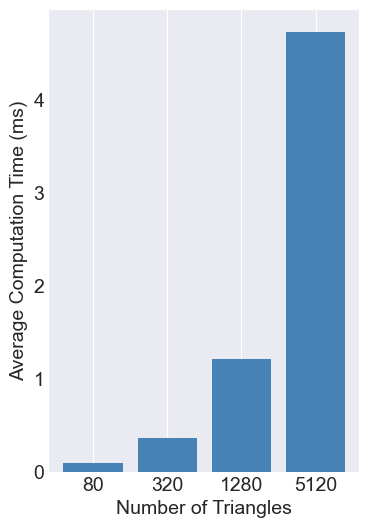

In [120]:
data_coarse = pd.read_csv("data/CoarseSphereResultsTime.csv")
data_semi_coarse = pd.read_csv("data/SemiCoarseSphereResultsTime.csv")
data_semi_detailed = pd.read_csv("data/SemiDetailedSphereResultsTime.csv")
data_detailed = pd.read_csv("data/DetailedSphereResultsTime.csv")

coarse_triangle_count = 80
semi_coarse_triangle_count = 320
semi_detailed_triange_count = 1280
detailed_triangle_count = 5120

data_coarse = data_coarse[data_coarse['depth'] <= 1.0]
data_semi_coarse = data_semi_coarse[data_semi_coarse['depth'] <= 1.0]
data_semi_detailed = data_semi_detailed[data_semi_detailed['depth'] <= 1.0]
data_detailed = data_detailed[data_detailed['depth'] <= 1.0]
data_coarse = data_coarse[data_coarse['depth'] >= 0.0]
data_semi_coarse = data_semi_coarse[data_semi_coarse['depth'] >= 0.0]
data_semi_detailed = data_semi_detailed[data_semi_detailed['depth'] >= 0.0]
data_detailed = data_detailed[data_detailed['depth'] >= 0.0]

avg_time_coarse = np.mean(data_coarse['timespan'])
avg_time_semi_coarse = np.mean(data_semi_coarse['timespan'])
avg_time_semi_detailed = np.mean(data_semi_detailed['timespan'])
avg_time_detailed = np.mean(data_detailed['timespan'])

# Triangle counts and corresponding average computation times
triangle_counts = ['80', '320', '1280', '5120']
average_times = [avg_time_coarse, avg_time_semi_coarse, avg_time_semi_detailed, avg_time_detailed]

# Create bar chart
plt.figure(figsize=(4, 6))
plt.bar(triangle_counts, average_times, color='steelblue')
plt.xlabel('Number of Triangles')
plt.ylabel('Average Computation Time (ms)')
plt.xticks(triangle_counts, ['80', '320', '1280', '5120'])
plt.grid(axis='y')

# Show plot
plt.show()